pip install yfinance
pip install matplotlib

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
start_date='2021-10-01'
end_date='2022-10-15'
ticker=['AAPL','ABT']

In [3]:
data=yf.download(ticker,start=start_date,end=end_date)

[*********************100%***********************]  2 of 2 completed


In [4]:
data.head()

Adj Close                   Close              \
                                 AAPL         ABT        AAPL         ABT   
Date                                                                        
2021-10-01 00:00:00-04:00  141.855103  114.832268  142.649994  117.209999   
2021-10-04 00:00:00-04:00  138.364655  113.186348  139.139999  115.529999   
2021-10-05 00:00:00-04:00  140.323685  113.529243  141.110001  115.879997   
2021-10-06 00:00:00-04:00  141.208725  114.126877  142.000000  116.489998   
2021-10-07 00:00:00-04:00  142.491547  115.518066  143.289993  117.910004   

                                 High                     Low              \
                                 AAPL         ABT        AAPL         ABT   
Date                                                                        
2021-10-01 00:00:00-04:00  142.919998  118.430000  139.110001  115.099998   
2021-10-04 00:00:00-04:00  142.210007  117.570000  138.270004  114.860001   
2021-10-05 00:00:00-04:00  142.240005  116.949997  139.360001  115.529999   
2021-10-06 00:00:00-04:00  142.149994  116.570000  138.369995  114.400002   
2021-10-07 00:00:00-04:00  144.220001  118.709999  142.720001  117.449997   

                                 Open                Volume           
                                 AAPL         ABT      AAPL      ABT  
Date                                                                  
2021-10-01 00:00:00-04:00  141.899994  118.199997  94639600  8173200  
2021-10-04 00:00:00-04:00  141.759995  116.610001  98322000  5903500  
2021-10-05 00:00:00-04:00  139.490005  116.110001  80861100  4238400  
2021-10-06 00:00:00-04:00  139.470001  115.750000  83221100  5498900  
2021-10-07 00:00:00-04:00  143.059998  117.550003  61732700  4505800

data.to_csv('stock_data.csv')

In [5]:
data.to_csv('stock_data.csv')

In [6]:
#making multiple index to single index
data.columns=data.columns.to_flat_index()

In [7]:
#tuple to multiindex
data.columns=pd.MultiIndex.from_tuples(data.columns)

In [8]:
close=data.loc[:,'Close'].copy()

In [9]:
close

,AAPL,ABT
Date,,
2021-10-01 00:00:00-04:00,142.649994,117.209999
2021-10-04 00:00:00-04:00,139.139999,115.529999
2021-10-05 00:00:00-04:00,141.110001,115.879997
2021-10-06 00:00:00-04:00,142.000000,116.489998
2021-10-07 00:00:00-04:00,143.289993,117.910004
...,...,...
2022-10-10 00:00:00-04:00,140.419998,101.129997
2022-10-11 00:00:00-04:00,138.979996,101.750000
2022-10-12 00:00:00-04:00,138.339996,100.080002


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

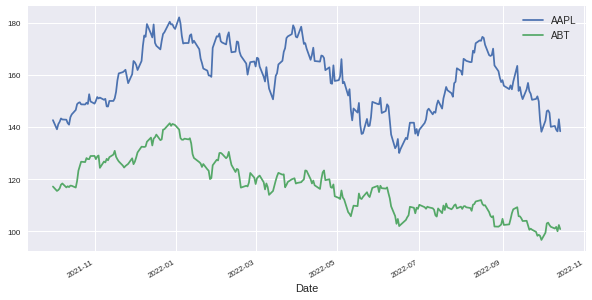

In [11]:
close.plot(figsize=(10,5),fontsize=8)
plt.legend(fontsize=10)
plt.show()

In [12]:
close.iloc[0,0]

142.64999389648438

In [13]:
close.AAPL.div(close.iloc[0,0])

Date
2021-10-01 00:00:00-04:00    1.000000
2021-10-04 00:00:00-04:00    0.975394
2021-10-05 00:00:00-04:00    0.989204
2021-10-06 00:00:00-04:00    0.995443
2021-10-07 00:00:00-04:00    1.004487
                               ...   
2022-10-10 00:00:00-04:00    0.984367
2022-10-11 00:00:00-04:00    0.974273
2022-10-12 00:00:00-04:00    0.969786
2022-10-13 00:00:00-04:00    1.002384
2022-10-14 00:00:00-04:00    0.970067
Name: AAPL, Length: 262, dtype: float64

In [14]:
normclose=close.div(close.iloc[0]).mul(100)

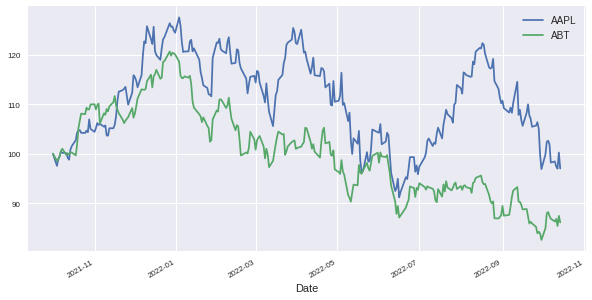

In [15]:
normclose.plot(figsize=(10,5),fontsize=8)
plt.legend(fontsize=10)
plt.show()

In [16]:
aapl=close.AAPL.copy().to_frame()

In [17]:
aapl

,AAPL
Date,
2021-10-01 00:00:00-04:00,142.649994
2021-10-04 00:00:00-04:00,139.139999
2021-10-05 00:00:00-04:00,141.110001
2021-10-06 00:00:00-04:00,142.000000
2021-10-07 00:00:00-04:00,143.289993
...,...
2022-10-10 00:00:00-04:00,140.419998
2022-10-11 00:00:00-04:00,138.979996
2022-10-12 00:00:00-04:00,138.339996


calculating change in previous close to current close

In [18]:
aapl.shift(periods=1)

,AAPL
Date,
2021-10-01 00:00:00-04:00,NaN
2021-10-04 00:00:00-04:00,142.649994
2021-10-05 00:00:00-04:00,139.139999
2021-10-06 00:00:00-04:00,141.110001
2021-10-07 00:00:00-04:00,142.000000
...,...
2022-10-10 00:00:00-04:00,140.089996
2022-10-11 00:00:00-04:00,140.419998
2022-10-12 00:00:00-04:00,138.979996


In [19]:
aapl['lag1']=aapl.shift(periods=1)

In [20]:
aapl.lag1

Date
2021-10-01 00:00:00-04:00           NaN
2021-10-04 00:00:00-04:00    142.649994
2021-10-05 00:00:00-04:00    139.139999
2021-10-06 00:00:00-04:00    141.110001
2021-10-07 00:00:00-04:00    142.000000
                                ...    
2022-10-10 00:00:00-04:00    140.089996
2022-10-11 00:00:00-04:00    140.419998
2022-10-12 00:00:00-04:00    138.979996
2022-10-13 00:00:00-04:00    138.339996
2022-10-14 00:00:00-04:00    142.990005
Name: lag1, Length: 262, dtype: float64

In [21]:
#aapl["diff"]=aapl.AAPL.sub(aapl.lag1)
aapl["diff"]=aapl.AAPL.diff(periods=1)

In [22]:
aapl["change_percent"]=aapl.AAPL.pct_change(periods=1).mul(100)
#aapl["change_percent"]=aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [23]:
del aapl["diff"]

In [24]:
aapl.rename(columns= {'change_percent':'change'},inplace=True)

resamping data

M - month
BM - month last working day

In [25]:
aapl.AAPL.resample("BM").last().pct_change(periods=1).mul(100)

Date
2021-10-29 00:00:00-04:00          NaN
2021-11-30 00:00:00-05:00    10.347129
2021-12-31 00:00:00-05:00     7.422870
2022-01-31 00:00:00-05:00    -1.571216
2022-02-28 00:00:00-05:00    -5.526950
2022-03-31 00:00:00-04:00     5.747339
2022-04-29 00:00:00-04:00    -9.713079
2022-05-31 00:00:00-04:00    -5.588327
2022-06-30 00:00:00-04:00    -8.142969
2022-07-29 00:00:00-04:00    18.863365
2022-08-31 00:00:00-04:00    -3.255180
2022-09-30 00:00:00-04:00   -12.097700
2022-10-31 00:00:00-04:00     0.130252
Freq: BM, Name: AAPL, dtype: float64

In [26]:
del aapl["change"]

In [27]:
ret= aapl.pct_change().dropna()

In [28]:
del ret['lag1']

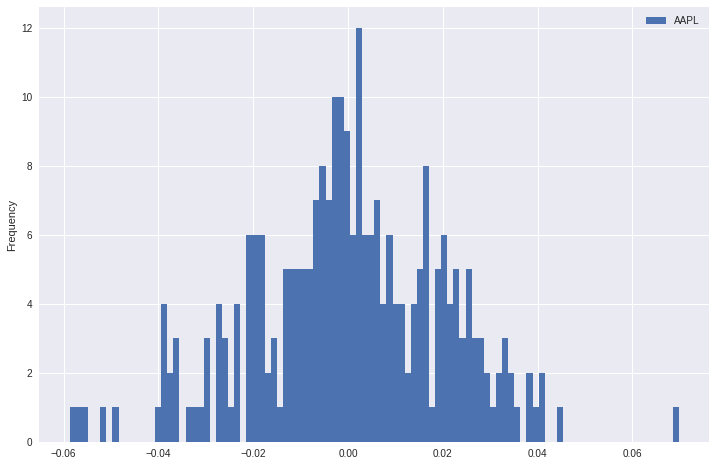

In [29]:
ret.plot(kind="hist",figsize=(12,8),bins=100)
plt.show()

In [30]:
daily_mean_return=ret.mean()
daily_mean_return

AAPL    0.000184
dtype: float64

In [31]:
daily_var=ret.var()
daily_var

AAPL    0.00041
dtype: float64

In [32]:
daily_std=np.sqrt(daily_var) #standard deviation
daily_std

AAPL    0.020244
dtype: float64

In [33]:
ret.std()

AAPL    0.020244
dtype: float64

In [34]:
annual_mean_return=daily_mean_return*252
annual_mean_return

AAPL    0.04626
dtype: float64

In [35]:
annual_var_return=daily_var*252
annual_var_return

AAPL    0.103277
dtype: float64

In [36]:
annual_std_return=np.sqrt(annual_var_return)
annual_std_return

AAPL    0.321368
dtype: float64

In [37]:
ret.std()*np.sqrt(252)

AAPL    0.321368
dtype: float64

In [38]:
ticker=["SPY","AAPL","KO","IBM","DIS","MSFT"]

In [39]:
data=yf.download(ticker,start=start_date,end=end_date)

[*********************100%***********************]  6 of 6 completed


In [40]:
close=data.loc[:,"Close"].copy()

In [41]:
normclose=close.div(close.iloc[0]).mul(100)

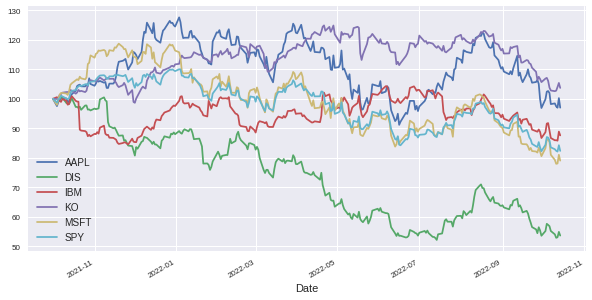

In [42]:
normclose.plot(figsize=(10,5),fontsize=8)
plt.legend(fontsize=10)
plt.show()

In [43]:
ret=normclose.pct_change().dropna()

In [44]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,261.0,0.000089,0.020263,-0.058680,-0.011676,0.000000,0.014923,0.069778
DIS,261.0,-0.002178,0.020223,-0.070737,-0.014956,-0.003019,0.010505,0.046785
IBM,261.0,-0.000387,0.015447,-0.095631,-0.008107,-0.000171,0.007674,0.071003
KO,261.0,0.000214,0.012213,-0.069626,-0.005264,0.001400,0.007028,0.038671
MSFT,261.0,-0.000701,0.019950,-0.054978,-0.012014,-0.001381,0.011995,0.066852
SPY,261.0,-0.000644,0.014080,-0.043482,-0.008819,-0.000817,0.008228,0.031794


In [45]:
summary=ret.describe().T.loc[:,["mean","std"]]

In [46]:
summary["mean"]=summary["mean"]*252
summary["std"]=summary["std"]*np.sqrt(252)

Text(0.5, 1.0, 'risk dashboard')

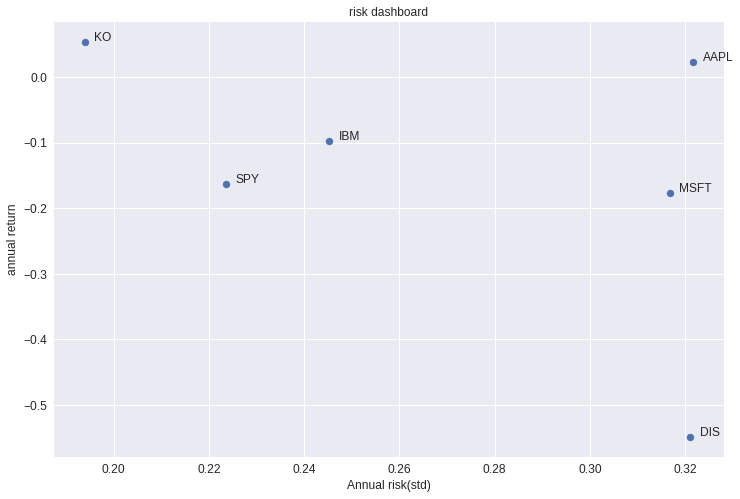

In [47]:
summary.plot.scatter(x="std",y="mean",figsize=(12,8),s=50,fontsize=12)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002 ),size=12)
plt.xlabel("Annual risk(std)", fontsize=12)
plt.ylabel("annual return", fontsize=12)
plt.title("risk dashboard")

covariance and corelation

In [50]:
#covariance
ret.cov()
ret.corr()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,1.000000,0.621586,0.363838,0.410347,0.791166,0.856154
DIS,0.621586,1.000000,0.267456,0.336743,0.621469,0.759908
IBM,0.363838,0.267456,1.000000,0.410499,0.305744,0.451433
KO,0.410347,0.336743,0.410499,1.000000,0.391616,0.530383
MSFT,0.791166,0.621469,0.305744,0.391616,1.000000,0.861100
SPY,0.856154,0.759908,0.451433,0.530383,0.861100,1.000000


In [53]:
#pip install seaborn
import seaborn as sns

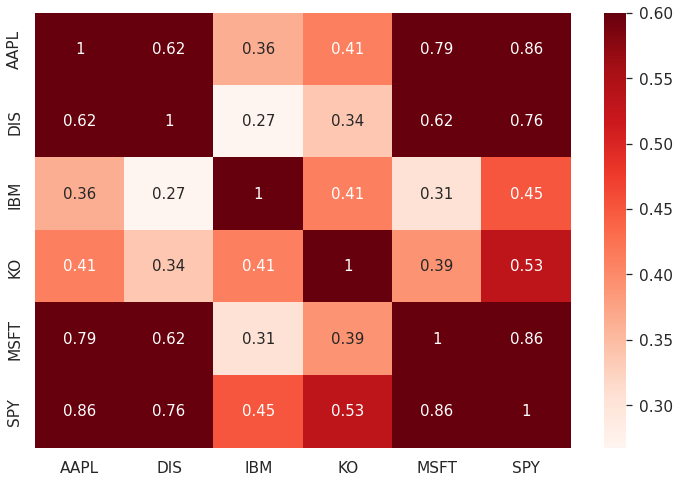

In [54]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=0.6)
plt.show()

#go for less correlated stocks for better diversification
# the above is for long term investment

simple returns and log Returns

In [56]:
df=pd.DataFrame(index=[2022,2021,2020],data=[20,40,30],columns=["Price"])
df

,Price
2022,20
2021,40
2020,30


In [57]:
simplereturns=df.pct_change().dropna()
simplereturns

,Price
2021,1.00
2020,-0.25


In [59]:
simplereturns.mean()

Price    0.375
dtype: float64

mean returns are misleading

In [63]:
logreturns=np.log(df/df.shift(1)).dropna()
logreturns

In [64]:
logreturns.mean()

Price    0.202733
dtype: float64

In [65]:
20*np.exp(logreturns.mean()*2)

Price    30.0
dtype: float64

In [67]:
#simple moviing average
SPY=yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [69]:
spy=SPY.Close.to_frame()

In [70]:
spy

,Close
Date,
1993-01-29 00:00:00-05:00,43.937500
1993-02-01 00:00:00-05:00,44.250000
1993-02-02 00:00:00-05:00,44.343750
1993-02-03 00:00:00-05:00,44.812500
1993-02-04 00:00:00-05:00,45.000000
...,...
2022-10-17 00:00:00-04:00,366.820007
2022-10-18 00:00:00-04:00,371.130005
2022-10-19 00:00:00-04:00,368.500000


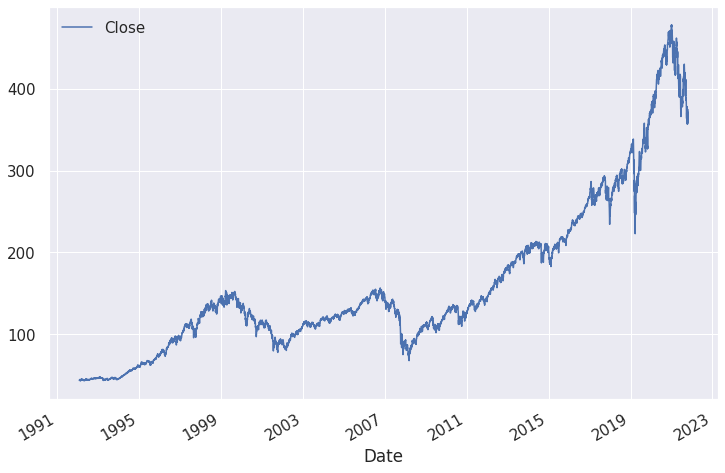

In [71]:
spy.plot(figsize=(12,8),fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.show()

In [74]:
spy_roll=spy.rolling(window=10)

In [76]:
spy_roll=spy_roll.mean()

In [79]:
spy_roll

,Close
Date,
1993-01-29 00:00:00-05:00,NaN
1993-02-01 00:00:00-05:00,NaN
1993-02-02 00:00:00-05:00,NaN
1993-02-03 00:00:00-05:00,NaN
1993-02-04 00:00:00-05:00,NaN
...,...
2022-10-17 00:00:00-04:00,365.579001
2022-10-18 00:00:00-04:00,364.895001
2022-10-19 00:00:00-04:00,364.036002


In [78]:
spy.rolling(window=10).median()

,Close
Date,
1993-01-29 00:00:00-05:00,NaN
1993-02-01 00:00:00-05:00,NaN
1993-02-02 00:00:00-05:00,NaN
1993-02-03 00:00:00-05:00,NaN
1993-02-04 00:00:00-05:00,NaN
...,...
2022-10-17 00:00:00-04:00,364.380005
2022-10-18 00:00:00-04:00,364.380005
2022-10-19 00:00:00-04:00,364.380005


In [ ]:
spy.rolling(window=10,min_periods=5).min().head(15)

In [83]:
# 50 DEMA
spy["sma50"]=spy.rolling(window=50,min_periods=50).mean()

In [ ]:
spy.head(55)

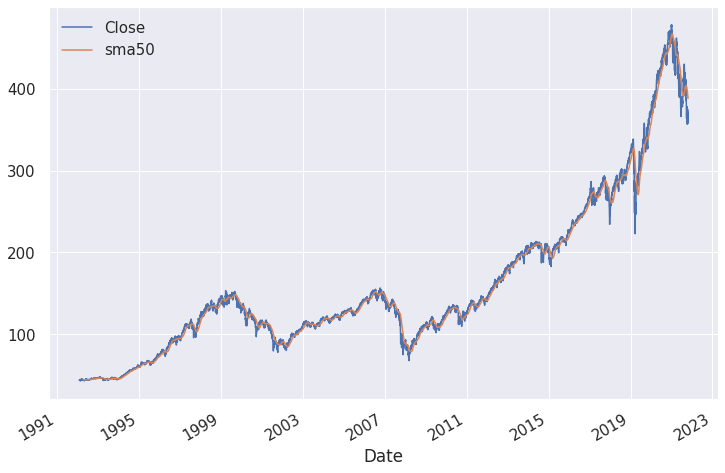

In [85]:
spy.plot(figsize=(12,8),fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.show()

In [87]:
# 200 DEMA
spy["sma200"]=spy.Close.rolling(window=200,min_periods=200).mean()

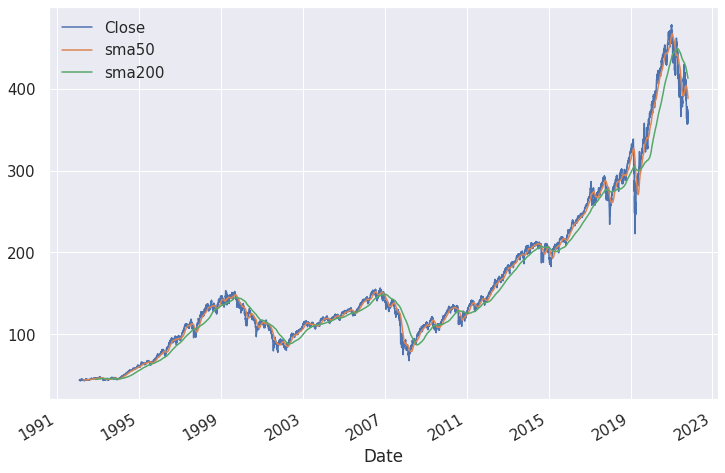

In [88]:
spy.plot(figsize=(12,8),fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.show()

Exponential moving average

In [89]:
spy["ema100"]=spy.Close.ewm(span=100,min_periods=100).mean()

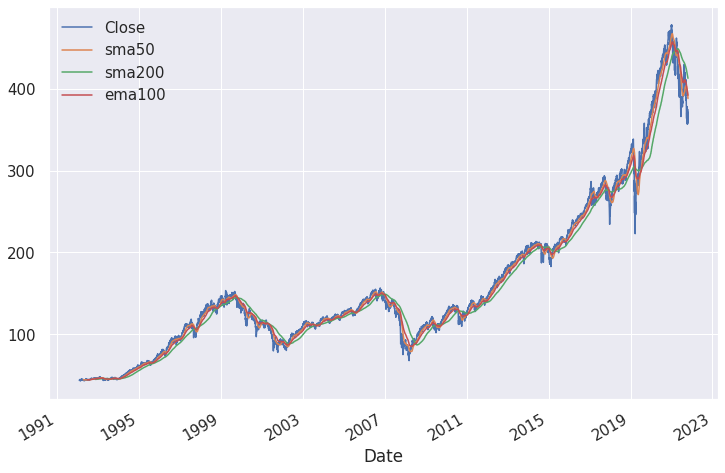

In [90]:
spy.plot(figsize=(12,8),fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.show()

In [91]:
spy['day']=spy.index.day_name()

In [93]:
spy['quarter']=spy.index.quarter

In [94]:
spy

,Close,sma50,sma200,ema100,day,quarter
Date,,,,,,
1993-01-29 00:00:00-05:00,43.937500,NaN,NaN,NaN,Friday,1
1993-02-01 00:00:00-05:00,44.250000,NaN,NaN,NaN,Monday,1
1993-02-02 00:00:00-05:00,44.343750,NaN,NaN,NaN,Tuesday,1
1993-02-03 00:00:00-05:00,44.812500,NaN,NaN,NaN,Wednesday,1
1993-02-04 00:00:00-05:00,45.000000,NaN,NaN,NaN,Thursday,1
...,...,...,...,...,...,...
2022-10-17 00:00:00-04:00,366.820007,391.563801,414.577451,393.590102,Monday,4
2022-10-18 00:00:00-04:00,371.130005,390.726602,414.058301,393.145347,Tuesday,4
2022-10-19 00:00:00-04:00,368.500000,389.869601,413.512251,392.657321,Wednesday,4


In [95]:
spy=yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [98]:
spy=spy.Close.to_frame()

In [101]:
alldays=pd.date_range(start='1993-01-01',end='2020-01-01',freq='D')

In [102]:
spy=spy.reindex(alldays)

In [104]:
# ffill -- forward fill
# bfill -- backward fill
spy.fillna(method='ffill')

,Close
1993-01-01,NaN
1993-01-02,NaN
1993-01-03,NaN
1993-01-04,NaN
1993-01-05,NaN
...,...
2019-12-28,NaN
2019-12-29,NaN
2019-12-30,NaN
2019-12-31,NaN


# 1:40